In [1]:
import os
import glob
#import tqdm
import numpy as np
#import pandas as pd
import multiprocessing
import pydicom as dicom
import nibabel as nib
#from keras import utils as kutils
from matplotlib import pyplot as plt

def load_image(label_fpath, transpose=False):
    #encode_name = label_fpath[-39: -7]
    label_data = nib.load(label_fpath)
    label_array = label_data.get_fdata()
    if transpose:
        label_array = np.transpose(label_array, axes=(2, 1, 0))
    return  label_array#, encode_name

In [2]:
cd ..

/home/u/wartytw


In [3]:
import pandas as pd
info = pd.read_csv('/data2/pancreas/Nifti_data/data_list.csv')

In [4]:
info['total'] = [1]*len(info)
pd.DataFrame(info.groupby(['resection']).sum().total)

,total
resection,
0.0,74
1.0,74
11.0,48
12.0,3


In [5]:
import pandas as pd
info = pd.read_csv('/data2/pancreas/Nifti_data/data_list.csv')
image_path = "/data2/pancreas/Nifti_data/image"
label_path = "/data2/pancreas/Nifti_data/label"

resec_train = np.load("resec_train.npy")
resec_val = np.load("resec_val.npy")
y_train = np.load("y_train.npy")
y_val = np.load("y_val.npy")

shape_tumor = np.load("box_tumor.npy")
tumor_shape = np.load("box_tumor.npy")

resec = np.concatenate([resec_train, resec_val], axis = 0)
y = np.concatenate([y_train, y_val], axis = 0)



In [6]:
image = load_image(os.path.join(image_path, "IM_"+resec[0]+".nii.gz"))

In [7]:
label = load_image(os.path.join(label_path, "LB_"+resec[0]+".nii.gz"))

In [14]:
np.where(label != 0)

(array([128, 128, 128, ..., 317, 317, 317]),
 array([257, 258, 259, ..., 313, 314, 315]),
 array([65, 65, 65, ..., 61, 61, 61]))

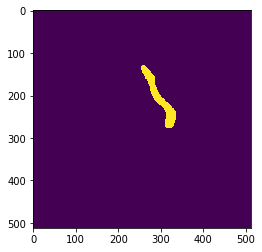

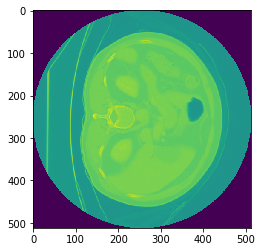

In [17]:
plt.imshow(label[  ..., 66])
plt.show()
plt.imshow(image[  ..., 66])
plt.show()

In [85]:
la = label[100:300, 200:350, 66].T

In [90]:
y = np.min(np.where(la != 0)[0])
x = np.min(np.where(la != 0)[1])

In [91]:
dir8 = [(-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0)]

In [92]:
def isBoundary(la, x, y):
    nonZero = False
    isZero = False
    for p in dir8:
        d1 = p[0]
        d2 = p[1]
        if(la[x+d1][y+d2] != 0):
            nonZero = True
        else:
            isZero = True
    if(nonZero and isZero):
        return True
    return False
    

In [ ]:
for i in range(150):
    for j in range(200):
        if(la[i][j] != 0):
            q = [(i, j)]
            
            while(q != []):
                tar = q[0]
                q = q[:1]
                for x, y in dir8:
                    if(isBoundary(la, x, y)):
                        q.append()
        
                
                
            

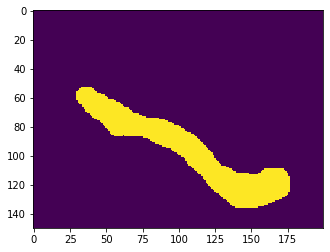

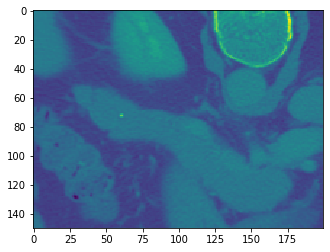

In [65]:

plt.imshow(label[100:300, 200:350, 66].T)
plt.show()

plt.imshow(image[100:300, 200:350, 66].T)
plt.show()


In [66]:
img = image[100:300, 200:350, 66].T

In [84]:
for i in range(2):
    print("alu_top alu"+str(i)+"(.src1(src1["+ str(i)+"]), .src2(src2["+str(i)+"]), .less(1'b1), .A_invert(ALU_control[0]),.B_invert(ALU_control[1]),   .cin(cin["+str(i)+"]), .operation(ALU_control[3:2]),   .result(result["+str(i)+"]), .cout(tmp_cout["+str(i)+"]) );" )

alu_top alu0(.src1(src1[0]), .src2(src2[0]), .less(1'b1), .A_invert(ALU_control[0]),.B_invert(ALU_control[1]),   .cin(cin[0]), .operation(ALU_control[3:2]),   .result(result[0]), .cout(tmp_cout[0]) );
alu_top alu1(.src1(src1[1]), .src2(src2[1]), .less(1'b1), .A_invert(ALU_control[0]),.B_invert(ALU_control[1]),   .cin(cin[1]), .operation(ALU_control[3:2]),   .result(result[1]), .cout(tmp_cout[1]) );


In [67]:
new_img = img
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if(img[i][j] < 50):
            new_img[i][j] = 0
        else:
            new_img[i][j] = 100
                

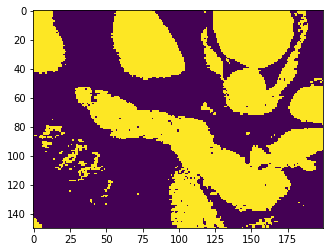

In [68]:
plt.imshow(new_img)

In [70]:
image2 = load_image(os.path.join(image_path, "IM_"+resec[17]+".nii.gz"))
label2 = load_image(os.path.join(label_path, "LB_"+resec[0]+".nii.gz"))


In [74]:
m2 = int(np.median(np.unique(np.where(label2 != 0)[2])))

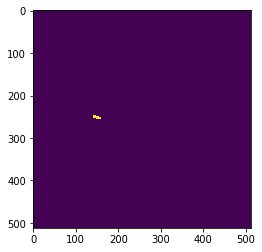

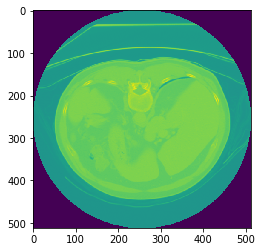

In [79]:
plt.imshow(label[  ..., m2+7].T)
plt.show()
plt.imshow(image[  ..., m2+7].T)
plt.show()

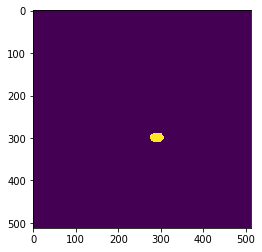

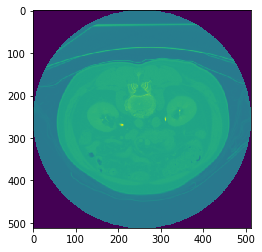

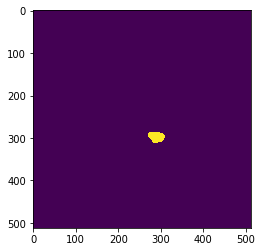

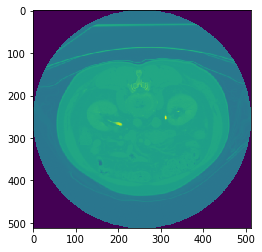

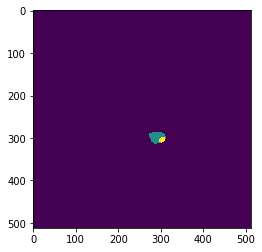

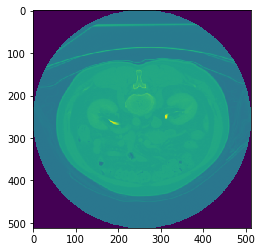

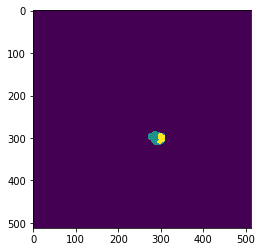

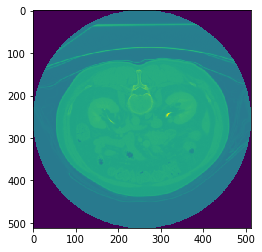

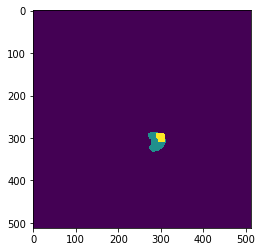

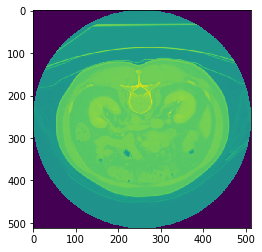

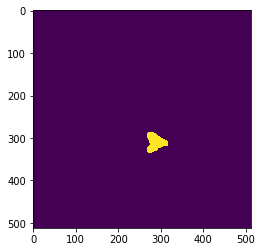

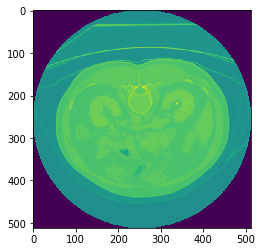

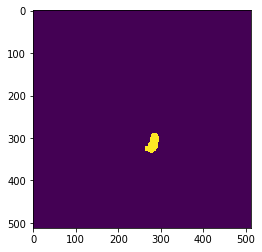

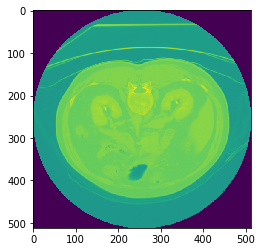

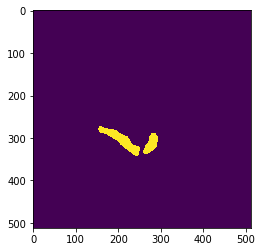

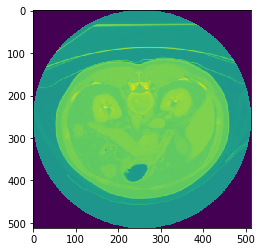

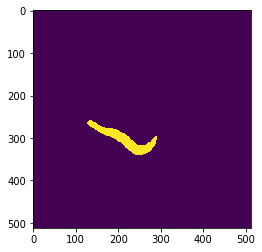

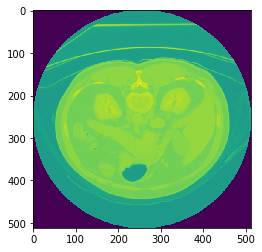

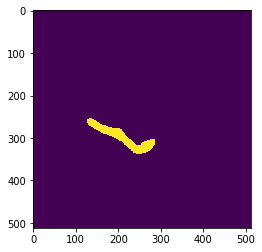

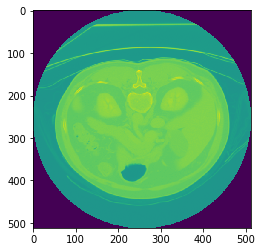

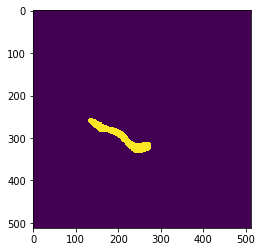

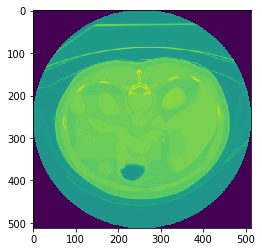

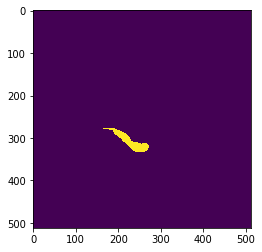

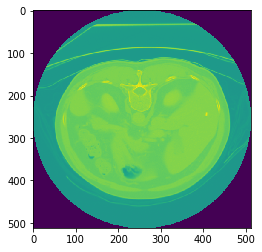

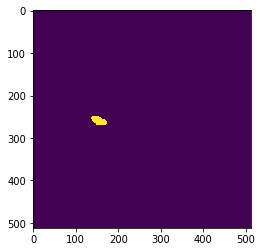

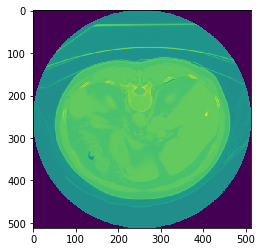

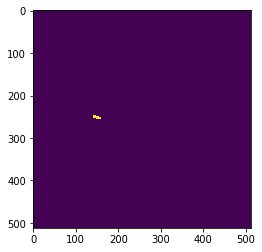

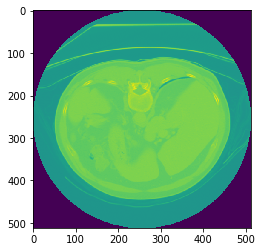

In [81]:
for i in arr:

    plt.imshow(label[  ..., i].T)
    plt.show()
    plt.imshow(image[  ..., i].T)
    plt.show()

In [80]:
arr = np.unique(np.where(label != 0)[2])